# 绘制手动神经网络和pytorch框架的效果

In [1]:
import numpy as np

In [2]:
def get_Data(file):
    data = np.loadtxt(file, skiprows=1)
    labels = "epoch train_loss test_loss  accuracy".split()
    return labels, data

In [10]:
labels, data_np_adam = get_Data("single_layer_numpy_adam.txt")

In [11]:
labels, data_np_sgd = get_Data("single_layer_numpy_sgd.txt")

In [12]:
labels, data_pytorch_adam = get_Data("single_layer_pytorch_adam.txt")

In [13]:
labels, data_pytorch_sgd = get_Data("single_layer_pytorch_sgd.txt")

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

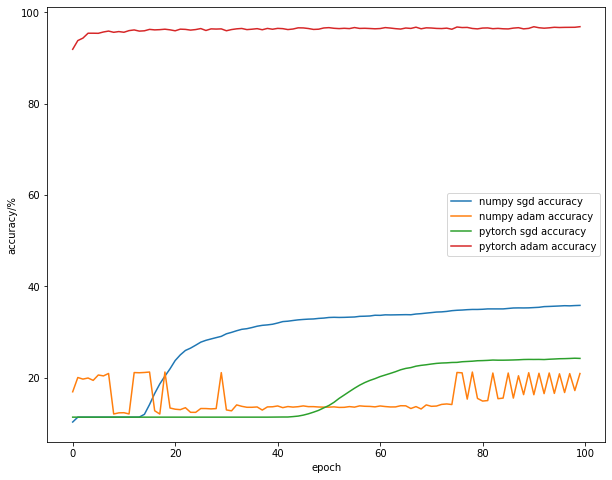

In [44]:
data = pd.DataFrame({"numpy sgd accuracy":data_np_sgd[:, 2]*100,
                     "numpy adam accuracy":data_np_adam[:, 2]*100,
                     "pytorch sgd accuracy":data_pytorch_sgd[:, 2]*100,
                     "pytorch adam accuracy":data_pytorch_adam[:, 2]*100,})
data.plot.line(figsize=(10,8))

plt.xlabel("epoch")
plt.ylabel("accuracy/%")
plt.savefig("准确率.png", dpi=300)

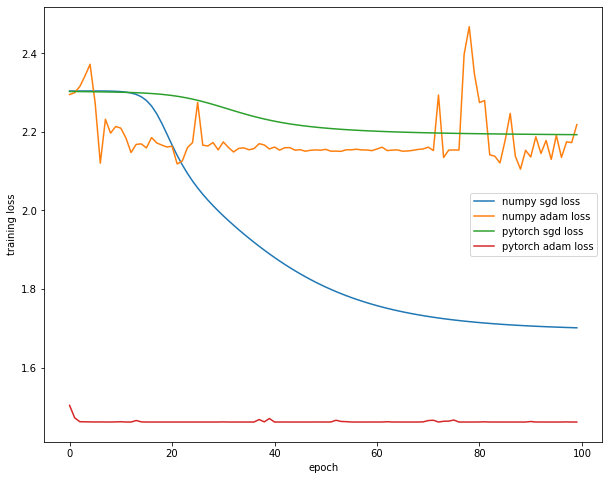

In [45]:
data = pd.DataFrame({"numpy sgd loss":data_np_sgd[:, 0],
                     "numpy adam loss":data_np_adam[:, 0],
                     "pytorch sgd loss":data_pytorch_sgd[:, 0],
                     "pytorch adam loss":data_pytorch_adam[:, 0],})
data.plot.line(figsize=(10,8))

plt.xlabel("epoch")
plt.ylabel("training loss")
plt.savefig("损失.png", dpi=300)

In [15]:
labels, zero_init = get_Data("weight_multi_layer_adam_0bias.txt")

In [16]:
labels, Kaiming_init = get_Data("weight_multi_layer_adam_Kaiming.txt")

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
zero_init[:, 2].shape

(50,)

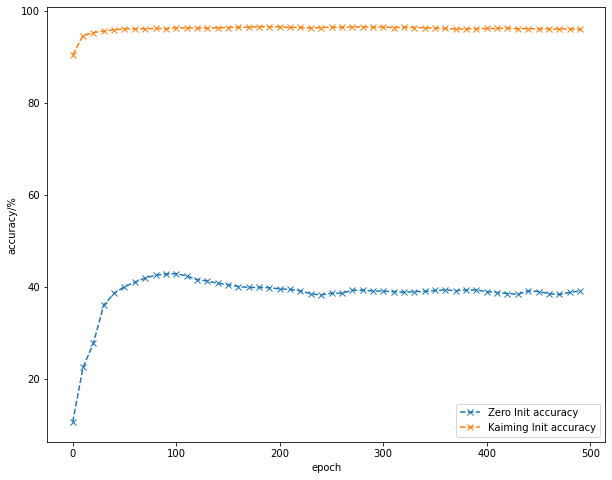

In [28]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(zero_init[:, -1]))*10,zero_init[:, -1]*100,'x--')
plt.plot(np.arange(len(zero_init[:, -1]))*10,Kaiming_init[:, -1]*100,'x--')
plt.legend(["Zero Init accuracy", "Kaiming Init accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy/%")
plt.savefig("准确率2.png", dpi=300)

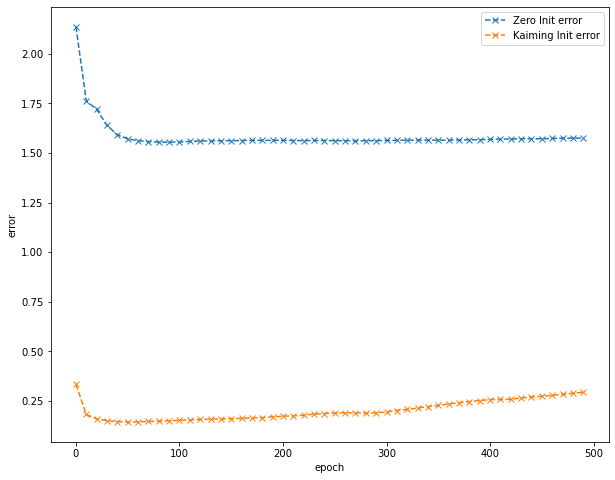

In [33]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(zero_init[:, -1]))*10,zero_init[:, -2],'x--')
plt.plot(np.arange(len(zero_init[:, -1]))*10,Kaiming_init[:, -2],'x--')
plt.legend(["Zero Init error", "Kaiming Init error"])
plt.xlabel("epoch")
plt.ylabel("error")
plt.savefig("验证误差2.png", dpi=300)

In [31]:
labels, fixed_lr = get_Data("weight_multi_layer_adam_fixed_lr.txt")
labels, e_lr = get_Data("weight_multi_layer_adam_e_lr.txt")
labels, step_lr = get_Data("weight_multi_layer_adam_step_lr.txt")

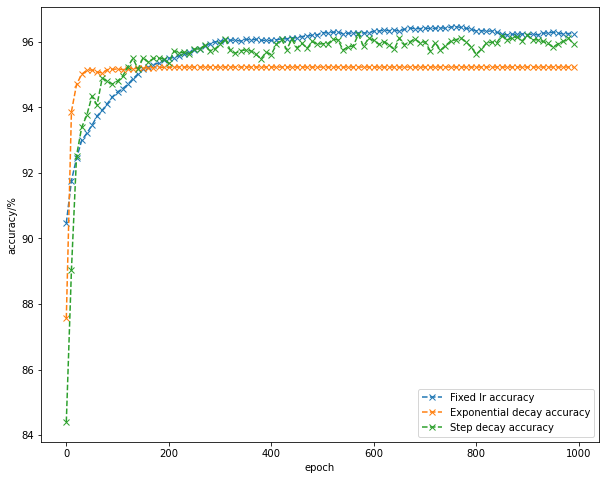

In [32]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(fixed_lr[:, -1]))*10,fixed_lr[:, -1]*100,'x--')
plt.plot(np.arange(len(e_lr[:, -1]))*10,e_lr[:, -1]*100,'x--')
plt.plot(np.arange(len(step_lr[:, -1]))*10,step_lr[:, -1]*100,'x--')
plt.legend(["Fixed lr accuracy", "Exponential decay accuracy", "Step decay accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy/%")
plt.savefig("准确率3.png", dpi=300)

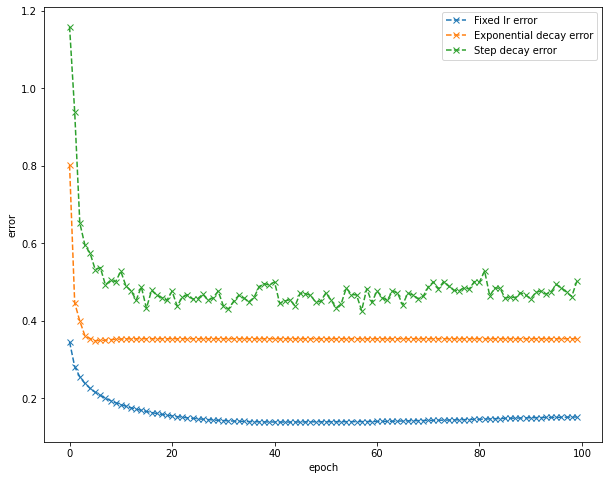

In [35]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(len(fixed_lr[:, -2]))*1,fixed_lr[:, -2]*1,'x--')
plt.plot(np.arange(len(e_lr[:, -2])),e_lr[:, -2]*1,'x--')
plt.plot(np.arange(len(step_lr[:, -2]))*1,step_lr[:, -2]*1,'x--')
plt.legend(["Fixed lr error", "Exponential decay error", "Step decay error"])
plt.xlabel("epoch")
plt.ylabel("error")
plt.savefig("验证误差3.png", dpi=300)